Ch4. 머신 러닝의 기본 요소
----------

- 아는 부분은 빠르게 스킵

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from keras import models, layers

%matplotlib inline

Using TensorFlow backend.


### 4.1 머신 러닝의 네 가지 분류

#### 4.1.1 지도 학습

- classification, regression
- sequence generation
- syntax tree
- object detection
- image segementation


#### 4.1.2 비지도 학습
- dimensionality reduction
- clustering


#### 4.1.3 자기 지도 학습(self-supervised learning)

지도 학습의 특별한 경우이지만 별도의 범주로 할 만큼 충분히 다른 케이스
- 자기 지도 학습은 지도 학습이지만 사람이 만든 레이블을 사용하지 않음
- 학습 과정에 사람이 개입하지 않는 지도 학습
- 학습이 무언가에 지도되어야 하므로 레이블이 여전히 필요하지만 보통 경험적인 알고리즘(heuristic algorithm)을 사용하여 입력 데이터로부터 생성

대표적인 예로 Autoencoder(오토인코더)가 있다.
- 생성된 타깃은 수정하지 않은 원본 입력
- 같은 방식으로 지난 프레임이 주어졌을 때 비디오의 다음 프레임을 예측하는 것이나, 이전 단어가 주어졌을 때 다음 단어를 예측하는 것이 자기 지도 학습의 예
- 미래의 입력 데이터로부터 지도되기 때문에 시간에 따른 지도 학습
  - temporally supervised learning
- 지도 학습, 자기 지도 학습, 비지도 학습 구분은 가끔 모호함...


#### 4.1.4 강화 학습

reinforcement learning
- 강화 학습에서 agent는 환경에 대한 정보를 받아 보상을 최대화하는 행동을 선택하도록 학습

**기타 tips**

미니 배치 또는 배치
- 모델에 의해 동시에 처리되는 소량의 샘플 묶음
- 일반적으로 8개에서 128개 사이
- 샘플 개수는 GPU의 메모리 할당이 용이하도록 2의 거듭제곱으로 하는 경우가 많음
- 훈련할 때 미니 배치마다 한 번씩 모델의 가중치에 적용할 경사 하강법 업데이트 값을 계산

### 4.2 머신 러닝 모델 평가

머신 러닝 Goal - 일반화된 모델을 얻는 것

#### 4.2.1 train, validation, test set

기본적인 내용은 책 잠조
- 왜 우리가 튜닝을 해야 하는가
- overfitting을 방지하는 것이 어떤 의미를 지니는가
- 하나의 검증 세트로만 계속 튜닝을 하면 어떤 문제가 발생하는가

**hold-out validation**
- 단순 홀드아웃 검증
- 단점
  - 데이터가 적을 때는 검증 세트와 테스트 세트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수 있다.
  - 그래서 다른 방법 쓰는 게 낫다.

![alt text](https://datavedas.com/wp-content/uploads/2018/04/image001.jpg)

**K-Fold cross validiont**

- 동일한 크기를 가진 K개를 분할로 나눔
- 각 분할 i에 대해 남은 K - 1 개의 분할로 모델을 훈련하고 분할 i에서 모델을 평가
- 최종 점수는 이렇게 얻은 K개의 점수를 평균함
- 모델 튜닝에 별개의 검증 세트를 사용

![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

**iterated K-Fold cross validation with suffling**

비교적 가용 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용
- k-fold를 적용하기 전 매번 무작위로 데이터를 섞음
- 최종 점수는 모든 K-fold 교차 검증을 실행해서 얻은 점수의 평균이 됨

참고
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#### 4.2.2 기억해야 할 것

**대표성 이는 데이터**
- 훈련 세트와 테스트 세트가 주어진 데이터에 대한 대표성이 있어야 함
- 예를 들면 숫자 이미지를 분류하는 문제에서 샘플 배열이 클래스 순서대로 나열되어 있다고 가정해보면...
  - 80% 20%로 나누면 앞에는 0~7만 뒤에는 8~9 숫자만 담기게 된다
  - 그래서 잘 섞고 준비해야함 -0-

**시간의 방향**
- 과거로부터 미래를 예측하려고 한다면... 데이터를 분할하기 전에 무작위로 섞어서는 절대 안 됨
- 이렇게 하면 미래의 정보가 누설되기 떄문
- 즉, 모델이 사실상 미래 데이터에서 훈련 될 거임...
- 테스트 세트의 모든 데이터가 미래의 것이어야 함

**데이터 중복**
- 중복하지 말자

### 4.3 데이터 전처리, feature engineering

데이터 전처리
- 후...

Feature engineering
- 특정 도메인에 종속적
- 예를 들어 텍스트 데이터나 이미지 데이터에 특화 됨

#### 4.3.1 NN을 위한 데이터 전처리

데이터 전처리의 목적은 주어진 원본 데이터를 신경망에 적용하기 쉽도록 만드는 것

**Vectorization**(벡터화)
- NN에서 모든 입력과 타깃은 부동 소수 데이터로 이루어진 텐서여야 함(또는 특정 경우에 정수로 이루어진 텐서)
- 뭐든 텐서로 변환 필요

**Normalization**(정규화)
- 작은 값을 취하도록 한다. 대부분 값이 0~1사이이면 좋다.
- 균일하면 좋다. 즉 모든 특성이 대체로 비슷한 범위를 가져야 한다.
- 꼭...필수적이지는 않지만..
  - 각 특성별로 평균이 0이 되도록 정규화 하면 좋다.
  - 각 특성별로 표준 평차가 1이 되도록...정규화

**null handling**
- 배운대로!

**feature extraction**

#### 4.3.2 feature engineering
- feature engineering
- https://en.wikipedia.org/wiki/Feature_engineering
- 특성을 더 간단한 방식으로 표현하여 문제를 쉽게 만듬
  - 해당 문제에 대한 이해는 필수
- 딥러닝 이전에는 중요...
  - 그러나 딥러닝 시대에는 필요하지 않음
  - NN이 자동으로 원본 데이터에서 유용한 특성을 추출할 수 있기 때문이다.
- 그럼 안 써도 돼냐? 꼭 그런건 아니다.
  - 좋은 특성은 적은 자원을 사용하여 문제를 더 멋지게 풀어낼 수 있다.
  - 좋은 feature는 더 적은 데이터로 문제를 풀 수 있다. 딥러닝 모델이 스스로 특성을 학습하는 능력은 가용한 훈련 데이터가 많을 때 발휘됨. 샘플의 개수가 적다는 특성에 있는 정보가 매우 중요해짐
  - 결론은 상황에 맞게

### 4.4 Overfitting and Underfitting

좋은 자료
- https://opentutorials.org/module/3653/22071

**How to handle overfitting problems?**
- 데이터를 더 많이 모은다.
- 모델이 수용할 수 있는 정보의 양을 조절하거나 저장할 수 있는 정보에 제약을 가함
- regularization을 잘 써먹자

#### 4.4.1 Reducing the network's size

모델의 크기를 조정
- 학습 파라미터의 수를 조정하는 것
- layer 수와 각 layer의 unit수에 따라 결정됨
- 딥러닝에서는 모델에 있는 학습 파라미터의 수를 종종 모델의 capacity라고 함
- 우리가 해야할 건 최적화를 뛰어넘는 일반화

capacity에 제약이 있다면...?
- 압축된 표현을 학습하게 해야 함

마법같은 방법은 없다. -0-

적은 수로 접근하면서 점차 늘려나가는 방식을 취한다

In [8]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [15]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [16]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 195us/step - loss: 0.4666 - acc: 0.8183 - val_loss: 0.3483 - val_acc: 0.8735
Epoch 2/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.2626 - acc: 0.9090 - val_loss: 0.2848 - val_acc: 0.8907
Epoch 3/20
25000/25000 [==============================] - 2s 78us/step - loss: 0.2018 - acc: 0.9279 - val_loss: 0.2804 - val_acc: 0.8871
Epoch 4/20
25000/25000 [==============================] - 2s 70us/step - loss: 0.1665 - acc: 0.9425 - val_loss: 0.2941 - val_acc: 0.8836
Epoch 5/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.1478 - acc: 0.9482 - val_loss: 0.3104 - val_acc: 0.8802
Epoch 6/20
25000/25000 [==============================] - 2s 65us/step - loss: 0.1267 - acc: 0.9566 - val_loss: 0.3366 - val_acc: 0.8752
Epoch 7/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.1159 - acc: 0.9600 - val_loss: 0.3651 - val_a

In [17]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.5915 - acc: 0.7400 - val_loss: 0.5376 - val_acc: 0.7880
Epoch 2/20
25000/25000 [==============================] - 2s 61us/step - loss: 0.4839 - acc: 0.8586 - val_loss: 0.4695 - val_acc: 0.8548
Epoch 3/20
25000/25000 [==============================] - 2s 70us/step - loss: 0.4086 - acc: 0.9013 - val_loss: 0.4107 - val_acc: 0.8813
Epoch 4/20
25000/25000 [==============================] - 2s 61us/step - loss: 0.3350 - acc: 0.9230 - val_loss: 0.3576 - val_acc: 0.8804
Epoch 5/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.2692 - acc: 0.9349 - val_loss: 0.3156 - val_acc: 0.8879
Epoch 6/20
25000/25000 [==============================] - 2s 61us/step - loss: 0.2216 - acc: 0.9409 - val_loss: 0.2954 - val_acc: 0.8871
Epoch 7/20
25000/25000 [==============================] - 2s 71us/step - loss: 0.1910 - acc: 0.9449 - val_loss: 0.2867 - val_acc

In [18]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']


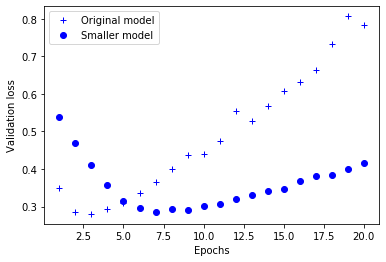

In [19]:
# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [20]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [21]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 10s 401us/step - loss: 0.4603 - acc: 0.7966 - val_loss: 0.3426 - val_acc: 0.8572
Epoch 2/20
25000/25000 [==============================] - 11s 426us/step - loss: 0.2209 - acc: 0.9138 - val_loss: 0.2781 - val_acc: 0.8865
Epoch 3/20
25000/25000 [==============================] - 9s 348us/step - loss: 0.1280 - acc: 0.9514 - val_loss: 0.3334 - val_acc: 0.8864
Epoch 4/20
25000/25000 [==============================] - 7s 300us/step - loss: 0.0546 - acc: 0.9815 - val_loss: 0.4133 - val_acc: 0.8834
Epoch 5/20
25000/25000 [==============================] - 10s 410us/step - loss: 0.0631 - acc: 0.9875 - val_loss: 0.4697 - val_acc: 0.8807
Epoch 6/20
25000/25000 [==============================] - 8s 309us/step - loss: 0.0024 - acc: 0.9997 - val_loss: 0.7376 - val_acc: 0.8735
Epoch 7/20
25000/25000 [==============================] - 7s 296us/step - loss: 0.1098 - acc: 0.9877 - val_loss: 0.6583

In [23]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

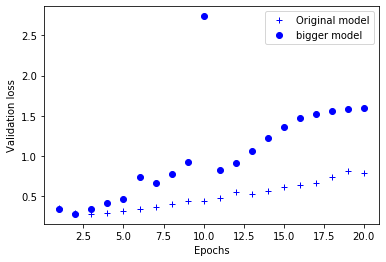

In [24]:
# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, bigger_model_val_loss, 'bo', label='bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [25]:
bigger_model_hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [27]:
bigger_model_hist.history['loss']

[0.4603186081600189,
 0.22091380422115325,
 0.12801656466960906,
 0.054635426207780835,
 0.06311132643371821,
 0.0023895707294344904,
 0.10982005628913641,
 0.0009388009798154235,
 0.00013818907369859517,
 2.2427114052698015e-05,
 0.13730216193530476,
 2.2861702803638762e-05,
 7.541847641696222e-06,
 1.3676619261423185e-06,
 2.3714087797088724e-07,
 5.544201306236118e-08,
 2.2329216132845885e-08,
 1.3560828498953014e-08,
 9.779402352592115e-09,
 7.663890588673894e-09]

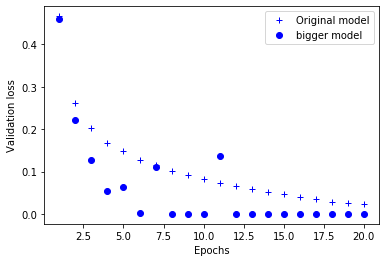

In [30]:
# b+ is for "blue cross"
plt.plot(epochs, original_hist.history['loss'], 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, bigger_model_hist.history['loss'], 'bo', label='bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#### 4.4.2 Adding weight regularization

어떤 train 데이터와 네트워크 구조가 주어졌을 때 데이터를 설명할 수 있는 가중치 값의 집합은 여러 개의 모델
- 간단한 모델이 복잡한 모델보다 덜 overfitting 될 가능성이 높다.

간단한 모델은...
- parameter 값 분포의 엔트로피가 작은 모델
- overfitting을 완화하기 위해서 일반적인 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것
- weight regularization
  - L1 regularization : 가중치 절댓값에 비례하는 cost 추가, L1 norm
  - L2 regularization : 가중치 제곱에 비례하는 cost 추가, L2 norm, L2는 NN에서 weight decay(가중치 감쇠)라고도 불림

In [37]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(
    units=16, 
    kernel_regularizer=regularizers.l2(l=0.001),
    activation='relu',
    input_shape=(10000,)))

l2_model.add(layers.Dense(
    units=16, 
    kernel_regularizer=regularizers.l2(l=0.001),
    activation='relu'))

l2_model.add(layers.Dense(
    units=1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2(l=0.001)?
- 가중치 행렬의 모든 우너소를 제곱하고 0.001을 곱하여 네트워크의 전체 loss에 더해진다는 의미
- 이 penalty 항은 traing 할 때만 추가됨

In [38]:
l2_model_hist = l2_model.fit(x_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 193us/step - loss: 0.4880 - acc: 0.8234 - val_loss: 0.3763 - val_acc: 0.8829
Epoch 2/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.3159 - acc: 0.9034 - val_loss: 0.3362 - val_acc: 0.8889
Epoch 3/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.2742 - acc: 0.9210 - val_loss: 0.3397 - val_acc: 0.8843
Epoch 4/20
25000/25000 [==============================] - 2s 66us/step - loss: 0.2533 - acc: 0.9279 - val_loss: 0.3452 - val_acc: 0.8810
Epoch 5/20
25000/25000 [==============================] - 2s 73us/step - loss: 0.2450 - acc: 0.9308 - val_loss: 0.3418 - val_acc: 0.8838
Epoch 6/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.2335 - acc: 0.9350 - val_loss: 0.3591 - val_acc: 0.8787
Epoch 7/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.2281 - acc: 0.9387 - val_loss: 0.3840 - val_a

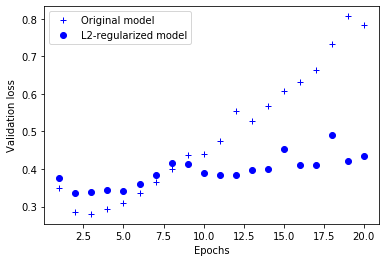

In [39]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


**regularization in keras**
```python

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)  <- ElasticNet
```

#### 4.4.3 Dropout

NN을 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외
- In Keras you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before it, e.g.:

**example**
- [0.2, 0.5, 1.3, 0.8, 1.1] -> [0, 0.5, 1.3, 0, 1.1]
- 보통 0.2 에서 0.5로 지정함

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRwoH6V6kxLJsjNXHWwVh-I2whGkGF1O6YNISG9G6zaR244O25Q)

In [40]:
dpt_model = models.Sequential()

dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))

dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))

dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [41]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.6104 - acc: 0.6540 - val_loss: 0.4848 - val_acc: 0.8610
Epoch 2/20
25000/25000 [==============================] - 2s 62us/step - loss: 0.4760 - acc: 0.7892 - val_loss: 0.3657 - val_acc: 0.8812
Epoch 3/20
25000/25000 [==============================] - 2s 66us/step - loss: 0.3889 - acc: 0.8491 - val_loss: 0.3057 - val_acc: 0.8862
Epoch 4/20
25000/25000 [==============================] - 2s 62us/step - loss: 0.3240 - acc: 0.8797 - val_loss: 0.2865 - val_acc: 0.8872
Epoch 5/20
25000/25000 [==============================] - 2s 72us/step - loss: 0.2835 - acc: 0.9010 - val_loss: 0.2798 - val_acc: 0.8866
Epoch 6/20
25000/25000 [==============================] - 2s 70us/step - loss: 0.2474 - acc: 0.9158 - val_loss: 0.2809 - val_acc: 0.8894
Epoch 7/20
25000/25000 [==============================] - 2s 73us/step - loss: 0.2237 - acc: 0.9268 - val_loss: 0.2957 - val_ac

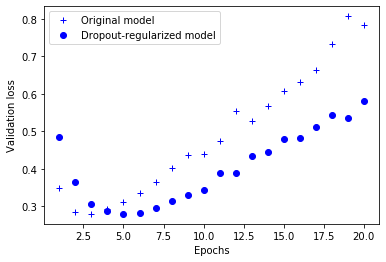

In [42]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

NN에서 overfitting을 방지하기 위해 널리 사용하는 방법은....
- 데이터를 더 모으기
- network capacity 감소
- adding weight regularization - L1, L2, L1_L2
- adding dropout